In [14]:
print("""This script was written in support of the experiments carried out in:
Nic Ezzell and Itay Hen, Advanced measurement techniques in quantum Monte Carlo: The permutation matrix representation approach, arXiv:2504.07295 (2025).""")

This script was written in support of the experiments carried out in:
Nic Ezzell and Itay Hen, Advanced measurement techniques in quantum Monte Carlo: The permutation matrix representation approach, arXiv:2504.07295 (2025).


In [3]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import glob
import pandas as pd
import sys
import scipy
sys.path.append("../../utils")
from exact_calculations import (prl_gs_chiE, prl_gs_chiF, prl_beta_chiE,
prl_beta_chiX, prl_beta_chiF, prl_gs_fidsus)

matplotlib.style.use("./style.mplstyle")
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

In [4]:
fname = "../data/advmeas_8by8tfim_data.csv"
cols = ["L", "lam", "Tsteps", "steps", "tot_steps", "avg_sgn", "avg_sgn_std", "avg_q", "max_q", 
        "a", "a_std", "a2", "a2_std", "aCorr", "aCorr_std", "aEint", "aEint_std", "aFint", "aFint_std", 
        "b", "b_std", "b2", "b2_std", "bCorr", "bCorr_std", "bEint", "bEint_std", "bFint", "bFint_std", 
        "ab", "ab_std", "abCorr", "abCorr_std", "abEint", "abEint_std", "abFint", "abFint_std", 
        "h", "h_std", "h2", "h2_std", "hDiag", "hDiag_std", "hDiag2", "hDiag2_std", 
        "hOffdiag", "hOffdiag_std", "hOffdiag2", "hOffdiag2_std", "zmag", "zmag_std", 
        "hDiagCorr", "hDiagCorr_std", "hDiagEint", "hDiagEint_std", "hDiagFint", "hDiagFint_std", 
        "hOffdiagCorr", "hOffdiagCorr_std", "hOffdiagEint", "hOffdiagEint_std", "hOffdiagFint", "hOffdiagFint_std", 
        "diagES", "diagES_std", "diagFS", "diagFS_std", "offDiagES", "offDiagES_std", "offDiagFS", "offDiagFS_std", 
        "Cv", "Cv_std", "a_therm", "a2_therm", "aCorr_therm", "aEint_therm", "aFint_therm", 
        "b_therm", "b2_therm", "bCorr_therm", "bEint_therm", "bFint_therm", "ab_therm", "abCorr_therm", 
        "abEint_therm", "abFint_therm", "h_therm", "h2_therm", "hDiag_therm", "hDiag2_therm", 
        "hOffdiag_therm", "hOffdiag2_therm", "zmag_therm", "hDiagCorr_therm", "hDiagEint_therm", 
        "hDiagFint_therm", "hOffdiagCorr_therm", "hOffdiagEint_therm", "hOffdiagFint_therm", 
        "diagES_therm", "diagFS_therm", "offDiagES_therm", "offDiagFS_therm", "Cv_therm", 
        "tot_cpu_time", "wall_time"]

df = pd.read_csv(fname, names=cols, skiprows=1)
df.head()

,L,lam,Tsteps,steps,tot_steps,avg_sgn,avg_sgn_std,avg_q,max_q,a,...,hOffdiagCorr_therm,hOffdiagEint_therm,hOffdiagFint_therm,diagES_therm,diagFS_therm,offDiagES_therm,offDiagFS_therm,Cv_therm,tot_cpu_time,wall_time
0,8,0.15,1000000,50000000,5000000000,1,0,0.430976,12,1.051169,...,True,True,True,True,True,True,True,True,5843.26534,73.715073
1,8,0.10,1000000,10000000,1000000000,1,0,0.190404,6,1.031135,...,True,True,True,True,True,True,True,True,1388.37672,14.510586
2,8,0.25,1000000,50000000,5000000000,1,0,1.199620,14,1.100129,...,True,True,True,True,True,True,True,True,9781.68431,108.425227
3,8,0.20,1000000,50000000,5000000000,1,0,0.766632,10,1.075560,...,True,True,True,True,True,True,True,True,7923.07362,107.559218
4,8,0.35,1000000,50000000,5000000000,1,0,2.343160,18,1.139456,...,True,True,True,True,True,True,True,True,18330.88160,174.979975


In [5]:
y_cols = []
y_labels = []

# add basic observables (k = 0 --> 5)
y_cols += ["h", "h2", "hDiag", "hDiag2", "hOffdiag", "hOffdiag2"]
y_labels += [r"$\langle H \rangle$", r"$\langle H^2 \rangle$",
            r"$\langle H_{\text{diag}} \rangle$", r"$\langle (H_{\text{diag}})^2 \rangle$",
            r"$\langle H_{\text{offdiag}} \rangle$", r"$\langle (H_{\text{offdiag}})^2 \rangle$"]
# add Hdiag correlator and such (k = 6 --> 8)
y_cols += ["hDiagCorr", "hDiagEint", "hDiagFint"]
y_labels += [r"$\langle H_{\text{diag}}(\tau=\beta/2) H_{\text{diag}} \rangle$",
             r"$\int_0^{\beta} \langle H_{\text{diag}}(\tau) H_{\text{diag}} \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle  H_{\text{diag}}(\tau) H_{\text{diag}} \rangle \mathrm{d} \tau $"]
# add Hoffdiag correlator and such (k = 9 --> 11)
y_cols += ["hOffdiagCorr", "hOffdiagEint", "hOffdiagFint"]
y_labels += [r"$\langle H_{\text{offdiag}}(\tau=\beta/2) H_{\text{offdiag}} \rangle$",
             r"$\int_0^{\beta} \langle H_{\text{offdiag}}(\tau) H_{\text{offdiag}} \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle  H_{\text{offdiag}}(\tau) H_{\text{offdiag}} \rangle \mathrm{d} \tau $"]
# add derived observables (k = 12 --> 16)
y_cols += ["Cv", "diagES", "diagFS", "offDiagES", "offDiagFS"]
y_labels += [r"Specific heat, $C_v$", r"$\chi^{H_{\text{diag}}}_{E}$", r"$\chi^{H_{\text{diag}}}_{F}$", r"$\chi^{H_{\text{offdiag}}}_{E}$", r"$\chi^{H_{\text{offdiag}}}_{F}$"]
# add A observables (k = 17 --> 21)
y_cols += ["a", "a2", "aCorr", "aEint", "aFint"]
y_labels += [r"$\langle A \rangle$", r"$\langle A^2 \rangle$",
             r"$\langle A(\tau=\beta/2) A \rangle$",
             r"$\int_0^{\beta} \langle A(\tau) A \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle A(\tau) A \rangle \mathrm{d} \tau$"]
# add B observables (k = 22 --> 26)
y_cols += ["b", "b2", "bCorr", "bEint", "bFint"]
y_labels += [r"$\langle B \rangle$", r"$\langle B^2 \rangle$",
             r"$\langle B(\tau=\beta/2) B \rangle$",
             r"$\int_0^{\beta} \langle B(\tau) B \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle B(\tau) B \rangle \mathrm{d} \tau$"]
# add AB observables (k = 27 --> 30)
y_cols += ["ab", "abCorr", "abEint", "abFint"]
y_labels += [r"$\text{Re}(\langle AB \rangle)$",
             r"$\langle A(\tau=\beta/2) B \rangle$",
             r"$\int_0^{\beta} \langle A(\tau) B \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle A(\tau) B \rangle \mathrm{d} \tau$"]

ebar_size = 6.5

# Basic observables plot

In [6]:
height = 5
width = height * 1.618

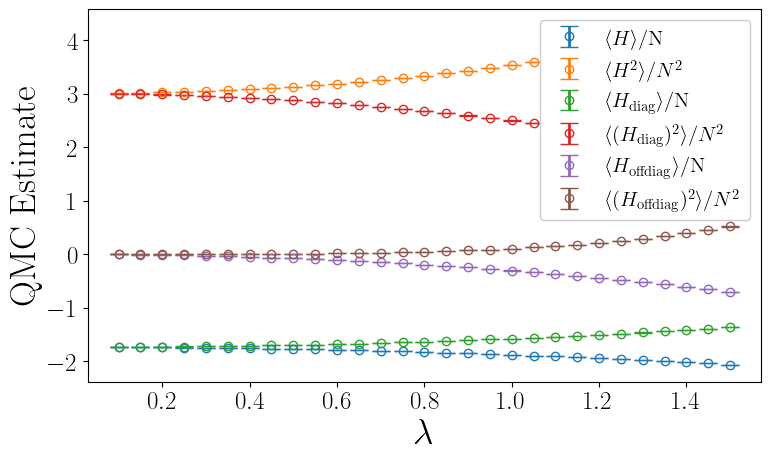

In [8]:
x_col = "lam"
N = 64
kmin = 0
kmax = 5

plt.figure(figsize=(width, height))  # Make the plot larger

for k in range(kmin, kmax + 1):
    #ax = axes[k]  # Select the correct subplot
    color = f"C{k}"
    y_col = y_cols[k]
    y_err = y_col + "_std"
    if k in [0, 2, 4]:
        y_vals = df[y_col] / N
        y_errs = 2 * df[y_err] / N
        ylabel = y_labels[k] + "/N"
    else:
        y_vals = df[y_col] / N**2
        y_errs = 2 * df[y_err] / N**2
        ylabel = y_labels[k] + r"/$N^2$"

    plt.errorbar(x=df[x_col], y=y_vals, yerr=y_errs, fmt='o', capsize=ebar_size, markerfacecolor='none', markeredgecolor=color, ecolor=color, label=ylabel)


# Set labels with larger fonts
plt.xlabel(r"$\lambda$", fontsize=26)
plt.ylabel("QMC Estimate", fontsize=26)
#plt.legend(fontsize=18, loc=(0.01,0.37))
plt.legend(fontsize=15)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

# Optimize layout for readability
plt.tight_layout(pad=1)  
plt.savefig("figures/advmea_basic_static.pdf", dpi=800, bbox_inches="tight")

# Correlators and such

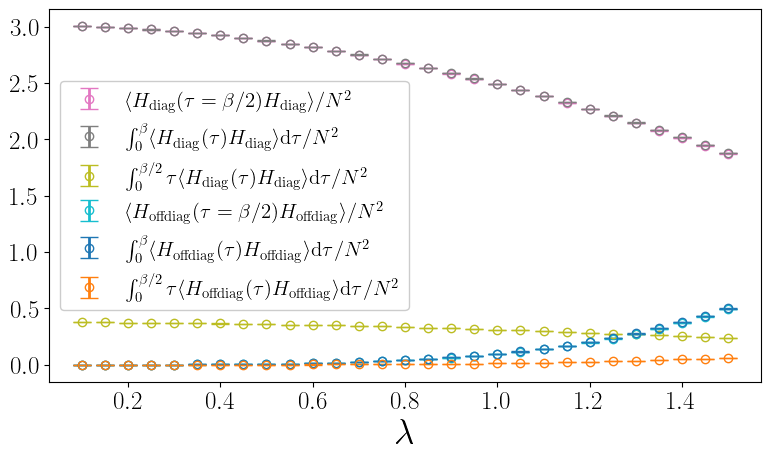

In [9]:
x_col = "lam"
kmin = 6
kmax = 11 

plt.figure(figsize=(width, height))  # Make the plot larger

for k in range(kmin, kmax + 1):
    #ax = axes[k]  # Select the correct subplot
    color = f"C{k}"
    y_col = y_cols[k]
    y_err = y_col + "_std"
    y_vals = df[y_col] / N**2
    y_errs = 2 * df[y_err] / N**2
    ylabel = y_labels[k] + r"/$N^2$"

    plt.errorbar(x=df[x_col], y=y_vals, yerr=y_errs, fmt='o', capsize=ebar_size, markerfacecolor='none', markeredgecolor=color, ecolor=color, label=ylabel)


# Set labels with larger fonts
plt.xlabel(r"$\lambda$", fontsize=26)
#plt.ylabel("QMC Estimate", fontsize=26)
#plt.legend(fontsize=18, loc=(0.01,0.37))
plt.legend(fontsize=15)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

# Optimize layout for readability
plt.tight_layout(pad=1)  
plt.savefig("figures/advmea_basic_dynamic.pdf", dpi=800, bbox_inches="tight")

# Derived observables

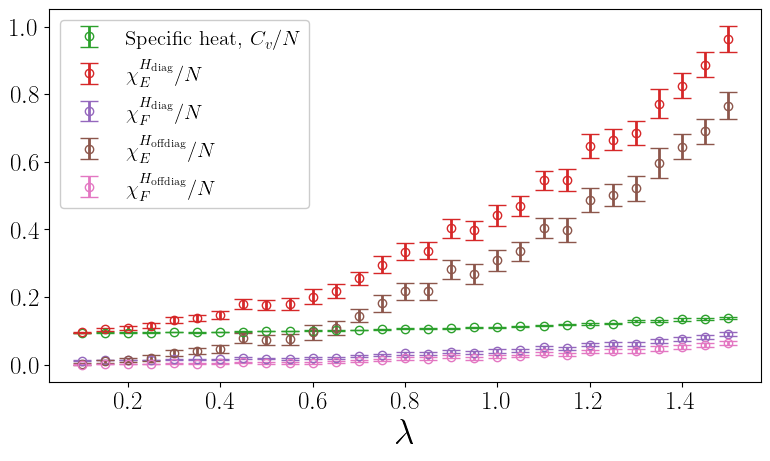

In [10]:
x_col = "lam"
kmin = 12
kmax = 16

plt.figure(figsize=(width, height))  # Make the plot larger

for k in range(kmin, kmax + 1):
    #ax = axes[k]  # Select the correct subplot
    color = f"C{k}"
    y_col = y_cols[k]
    y_err = y_col + "_std"
    y_vals = df[y_col] / N
    y_errs = 2 * df[y_err] / N
    ylabel = y_labels[k] + r"/$N$"

    plt.errorbar(x=df[x_col], y=y_vals, yerr=y_errs, fmt='o', capsize=ebar_size, markerfacecolor='none', markeredgecolor=color, ecolor=color, label=ylabel)


# Set labels with larger fonts
plt.xlabel(r"$\lambda$", fontsize=26)
#plt.ylabel("QMC Estimate", fontsize=26)
#plt.legend(fontsize=18, loc=(0.01,0.37))
plt.legend(fontsize=15)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

# Optimize layout for readability
plt.tight_layout(pad=1)  
plt.savefig("figures/advmea_derived.pdf", dpi=800, bbox_inches="tight")

# A observables

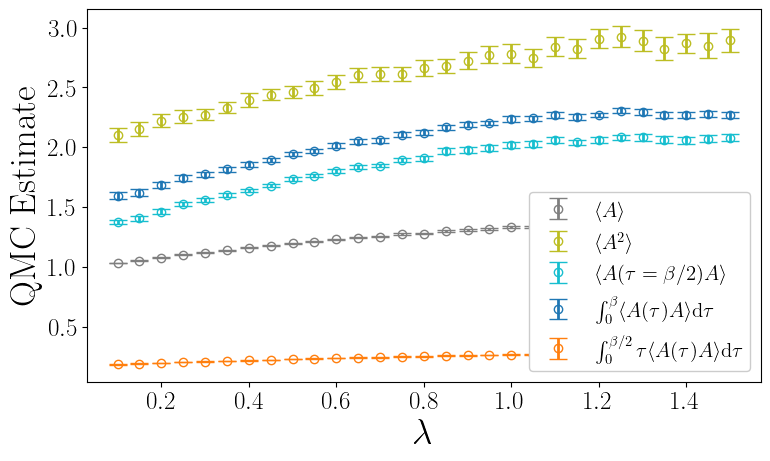

In [11]:
x_col = "lam"
kmin = 17
kmax = 21

plt.figure(figsize=(width, height))  # Make the plot larger

for k in range(kmin, kmax + 1):
    #ax = axes[k]  # Select the correct subplot
    color = f"C{k}"
    y_col = y_cols[k]
    y_err = y_col + "_std"
    y_vals = df[y_col]
    y_errs = 2 * df[y_err]
    ylabel = y_labels[k]

    plt.errorbar(x=df[x_col], y=y_vals, yerr=y_errs, fmt='o', capsize=ebar_size, markerfacecolor='none', markeredgecolor=color, ecolor=color, label=ylabel)


# Set labels with larger fonts
plt.xlabel(r"$\lambda$", fontsize=26)
plt.ylabel("QMC Estimate", fontsize=26)
#plt.legend(fontsize=18, loc=(0.01,0.37))
plt.legend(fontsize=15)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

# Optimize layout for readability
plt.tight_layout(pad=1)  
plt.savefig("figures/advmea_Aobs.pdf", dpi=800, bbox_inches="tight")

# B observables

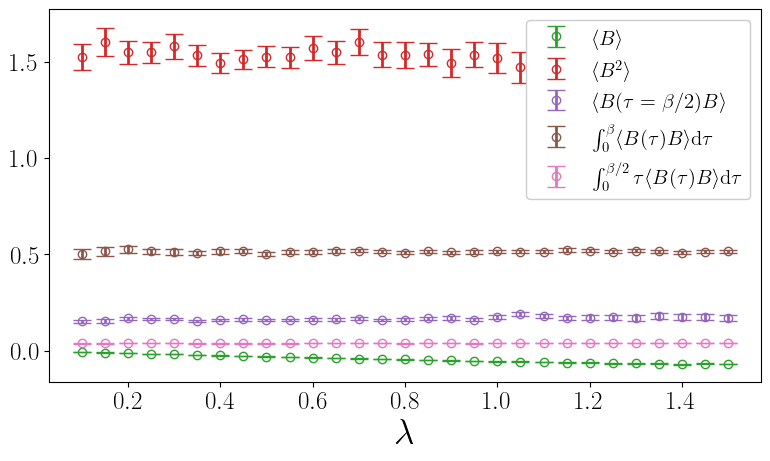

In [12]:
x_col = "lam"
kmin = 22
kmax = 26

plt.figure(figsize=(width, height))  # Make the plot larger

for k in range(kmin, kmax + 1):
    #ax = axes[k]  # Select the correct subplot
    color = f"C{k}"
    y_col = y_cols[k]
    y_err = y_col + "_std"
    y_vals = df[y_col]
    y_errs = 2 * df[y_err]
    ylabel = y_labels[k]

    plt.errorbar(x=df[x_col], y=y_vals, yerr=y_errs, fmt='o', capsize=ebar_size, markerfacecolor='none', markeredgecolor=color, ecolor=color, label=ylabel)


# Set labels with larger fonts
plt.xlabel(r"$\lambda$", fontsize=26)
#plt.ylabel("QMC Estimate", fontsize=26)
#plt.legend(fontsize=15, loc=(0.01,0.45))
plt.legend(fontsize=15)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

# Optimize layout for readability
plt.tight_layout(pad=1)  
plt.savefig("figures/advmea_Bobs.pdf", dpi=800, bbox_inches="tight")

# AB observables

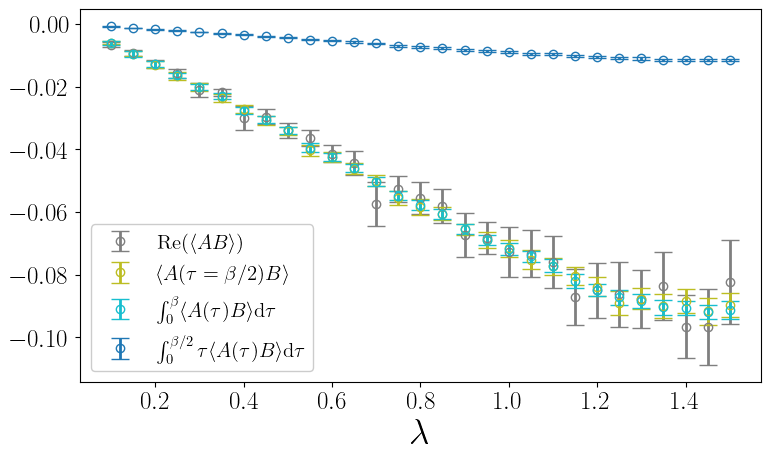

In [13]:
x_col = "lam"
kmin = 27
kmax = 30

plt.figure(figsize=(width, height))  # Make the plot larger

for k in range(kmin, kmax + 1):
    #ax = axes[k]  # Select the correct subplot
    color = f"C{k}"
    y_col = y_cols[k]
    y_err = y_col + "_std"
    y_vals = df[y_col]
    y_errs = 2 * df[y_err]
    ylabel = y_labels[k]

    plt.errorbar(x=df[x_col], y=y_vals, yerr=y_errs, fmt='o', capsize=ebar_size, markerfacecolor='none', markeredgecolor=color, ecolor=color, label=ylabel)


# Set labels with larger fonts
plt.xlabel(r"$\lambda$", fontsize=26)
#plt.ylabel("QMC Estimate", fontsize=26)
#plt.legend(fontsize=18, loc=(0.01,0.37))
plt.legend(fontsize=15)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)

# Optimize layout for readability
plt.tight_layout(pad=1)  
plt.savefig("figures/advmea_ABobs.pdf", dpi=800, bbox_inches="tight")